#### Classificadores Bayesianos

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from imutils import paths
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
pathDog = './dataset/training_set/cachorro'
pathCat = './dataset/training_set/gato'

In [3]:
def processImage (image,size = (32,32)):
    image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image,(32,32),interpolation  = cv2.INTER_AREA)
    image = image.flatten()
    return image

In [4]:
def load_images(path,size = (32,32)):
    imagePaths = list(paths.list_images(path))
   # imagePaths = imagePaths[0:10]
    images = []
    for (i,imagePath) in enumerate(imagePaths):
        try:
            imagePath = imagePath.replace('\\','/')
            image = cv2.imread(imagePath)
            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
            image = cv2.resize(image,size,interpolation = cv2.INTER_AREA)
            image  = image.flatten()
            images.append(image)
            
        except:
            print('Imagem Corrompida!!')
    images = np.array(images)
    return images

In [5]:
dataDog = load_images(pathDog)
dataCat = load_images(pathCat)

In [6]:
labelDog = np.zeros(len(dataDog))
labelCat = np.ones(len(dataCat))

In [7]:
(D_train, D_test, dl_train, dl_test) = train_test_split( dataDog, labelDog, test_size=0.20, random_state=42)
(C_train, C_test, cl_train, cl_test) = train_test_split( dataCat, labelCat, test_size=0.20, random_state=42)

In [8]:
X_train = np.concatenate((D_train,C_train))
y_train = np.concatenate((dl_train,cl_train))
X_test = np.concatenate((D_test,C_test))
y_test = np.concatenate((dl_test,cl_test))

In [9]:
gnb = GaussianNB()

In [10]:
y_pred = gnb.fit(X_train,y_train)

In [11]:
y_pred = gnb.predict(X_test)

In [12]:
print("Acuraccy in the %d tests: %f percent"
... % (X_test.shape[0], 100*(1 - (y_test != y_pred).sum()/X_test.shape[0])))


Acuraccy in the 40 tests: 62.500000 percent


#### Teste em uma imagem !!

In [13]:
pathT = './dataset/test_set/cachorro'

In [14]:
pathImages = list(paths.list_images(pathT))
dogT = pathImages[1]
dogT= dogT.replace('\\','/')

In [15]:
img = cv2.imread(dogT)

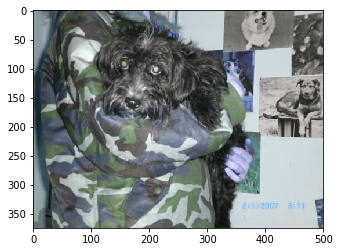

In [16]:
plt.imshow(img)

In [17]:
img = processImage(img)

In [18]:
y_pred = gnb.predict([img])
if y_pred[0] == 1:
    print('Cat')
else:
    print('Dog')

Dog


##### Obs : O dataset usado foi o mesmo do anterior para o Knn -> 80 cats, 80 dogs no treino e 20,20 nos testes